<a href="https://colab.research.google.com/github/Sapienza-AI-Lab-a-a-2021-22/esercitazione6/blob/main/Solutions_of_Logistic_Regression.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

This Exercise is designed for the understanding of the usage of the concepts of Machine learning basics. This lab exercise focusses on the implementation of logistic regression.

You are expected to implement the Sigmoid, Logistic_cost, Gradient and predict functions inorder to perform logistic regression on the given data(`ex2data1.txt` in git).

As a final task you are expected to do logistic regression on `heart disease` dataset which was added to git. 

## Import Libraries
Import the necessary libraries for DATA ANALYSIS(Pandas, Numpy), PLOTTING(Matplotlib,seaborn) and Machine Learning(Scikit-learn) 

In [3]:
# imports for the task

%matplotlib inline
 
# your imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Task - Sigmoid Funtion
Implement the sigmoid funtion in the below code block using the image provided.
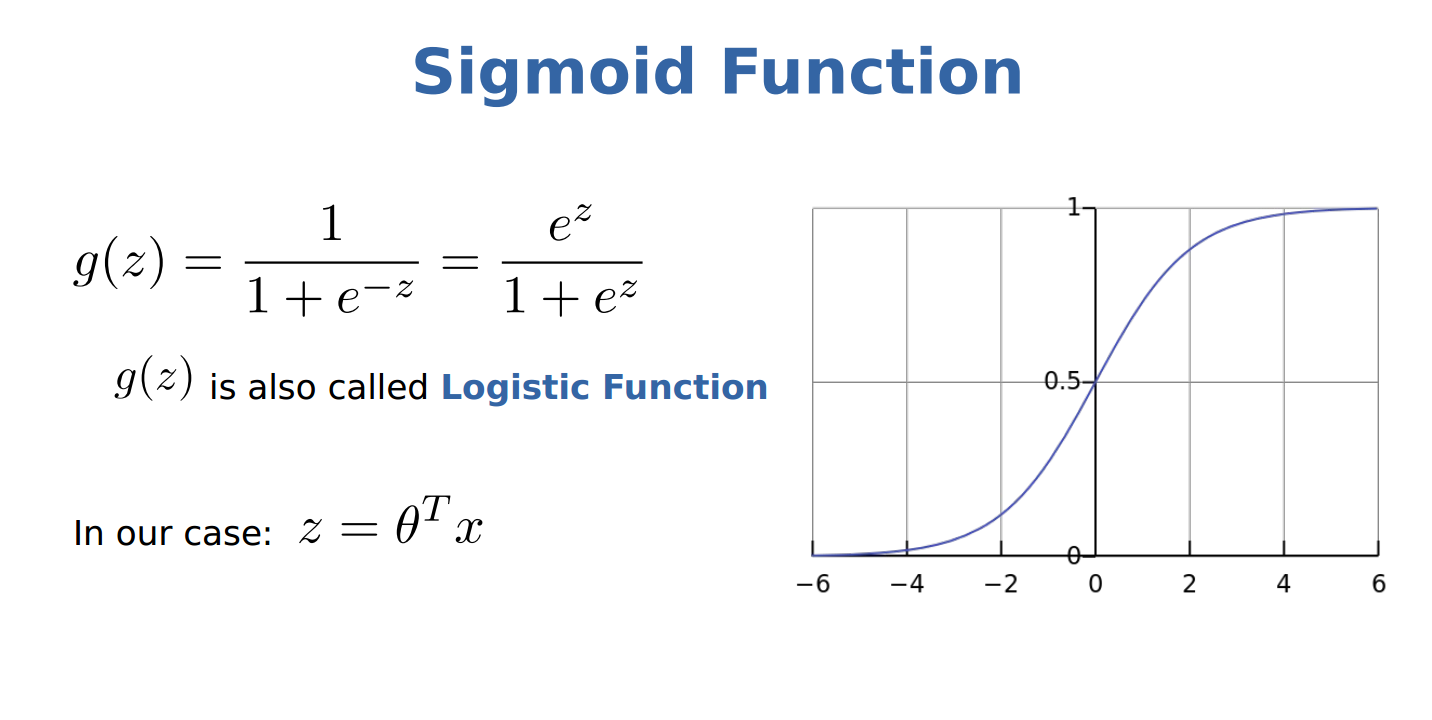

In [4]:
# vectorized sigmoid function
def sigmoid(z):
    e = np.exp(-z)
    return 1.0/(1+e)


##Task - Cost function and gradient

Implement the `logistic_cost` and `cost_gradient` funtions in the below code blocks using the image provided.

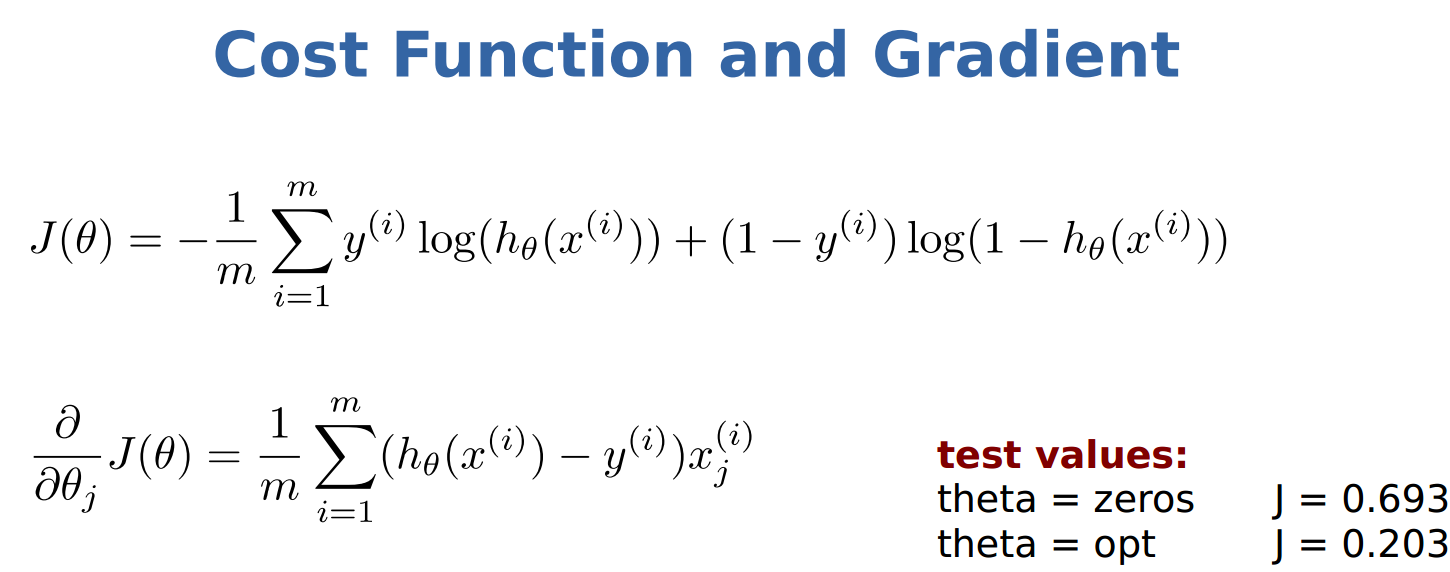

In [5]:
# Logistic Regression Cost Function
def logistic_cost(W, X, Y):
    h = sigmoid(np.dot(X,W))
    m = X.shape[0]
    l_cost = float(1.0/m * (-np.dot(Y.T,np.log(h)) - np.dot((1-Y).T,np.log(1-h))))
    return l_cost

In [6]:
# logistic regression cost gradient
def cost_gradient(W, X, Y):
    W = W.reshape((3,1))
    m, n = X.shape
    h = sigmoid(np.dot(X,W))
    c_grad = -1.0/m * (np.dot(X.T, (Y - h))).T
    return c_grad

##Task - Predict function

Implement `predict` function which returns `accuracy` and the predicted (`Y_hat`) using the following image.

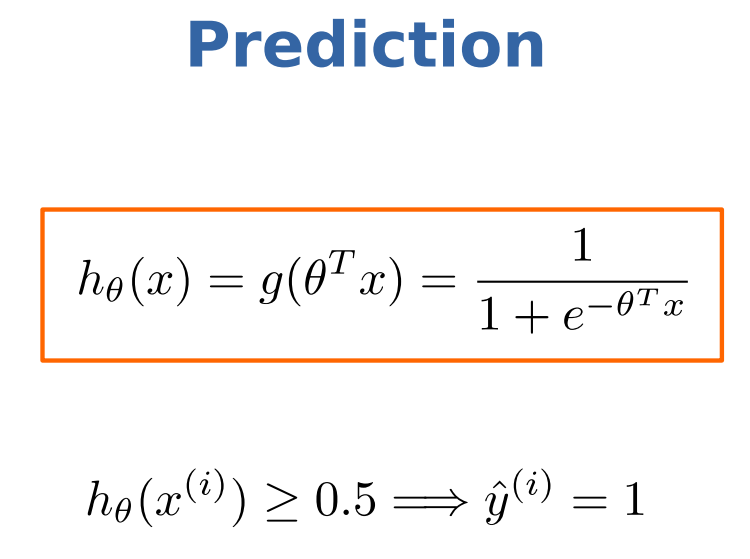

In [7]:
def predict(W, X, Y):
    m = X.shape[0]
    Y_hat = sigmoid(np.dot(X, W)) > 0.5
    accuracy = 1.0/m * np.sum(Y == Y_hat)
    return accuracy, Y_hat

### Load Dataset
from git, download the `ex2data1.txt` from `data` folder and upload into the runtime using the `upload` icon in the side bar of your colab.

Load the data into the dataframe and analyse the given data.
### Task
Verify data and use the column names as ['Exam 1', 'Exam 2', 'Admitted'] while reading the data into the datframe.

In [9]:
# Load test dataset
path = '/content/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


##Task -visualize the data

Fill with the plotting code in the `# your code here` for the plot to appear as shown in the output result.

Text(0, 0.5, 'Exam 2 Score')

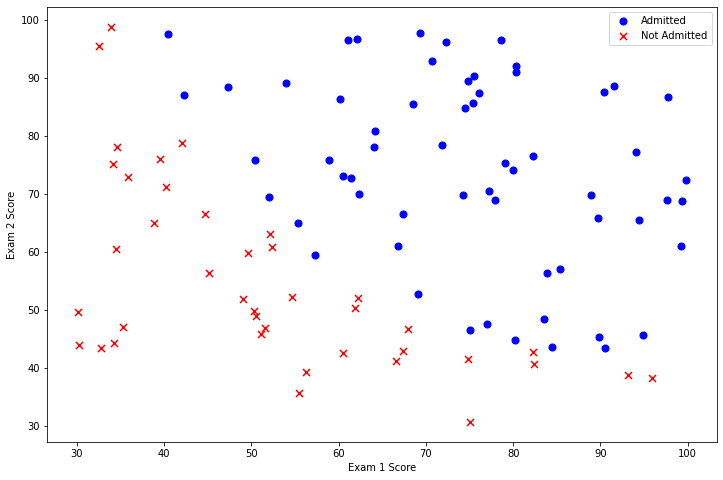

In [10]:
# visualize data:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

The following code helps in setting the input and output matrices for the data.

In [11]:
#set up input and output matrices
X = data[['Exam 1', 'Exam 2']].to_numpy()
m, n = X.shape
X = np.concatenate((np.ones((m,1)), X), axis=1 )
n +=1
Y = np.array(data[['Admitted']])

##Task - test the sigmoid

Fill in the following codeblock to visualise the sigmoid function given `z`

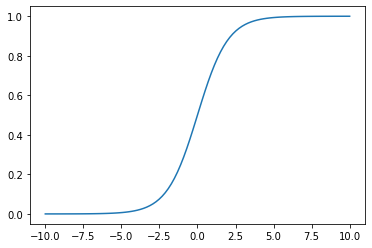

In [12]:
# Test sigmoid function
z = np.linspace(-10,10,100)
out = sigmoid(z)
plt.figure()
plt.plot(z, out)

In [13]:
# Test logistic cost function
W = np.matrix(np.zeros((3,1)))
print ('Test cost function: ', logistic_cost(W, X, Y))

Test cost function:  0.6931471805599453


Estimate the logistic cost after the optimisation using the following code example.
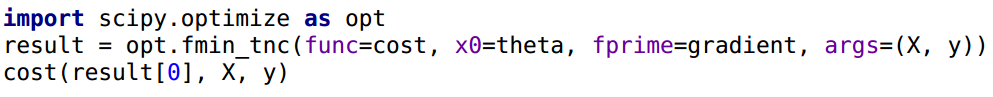

In [14]:
# Test logistic regression gradient
import scipy.optimize as opt
result = opt.fmin_tnc(func=logistic_cost, x0=W, fprime=cost_gradient, args=(X, Y))
print ('Logistic cost after optimization: ',logistic_cost(result[0], X, Y))

Logistic cost after optimization:  0.20349770158947478


In [15]:
# Predict with computed weights
accuracy1, Y_hat = predict(result[0], X, np.array(Y).reshape(m,))
# accuracy1 = sum(Y_hat == np.array(Y).reshape(m,))/(1.0*len(Y))
print("Accuracy with Ours: ", accuracy1)

Accuracy with Ours:  0.89


##Test
Predict the accuracy using the `result` from above code block and report `accuracy` using the `logistic regression` from scikit-learn.

In [16]:
# Test results with LIBLINEAR
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X, Y.reshape((m,)).T)

result = logreg.predict(X)
accuracy2 = sum(result == np.array(Y).reshape(m,))/(1.0*len(Y))
print("Accuracy with LIBLINEAR: ", accuracy2)

Accuracy with LIBLINEAR:  0.89


## Task - Heart Disease data
Load `Heart disease` data provided in the git from `data` folder and perform logistic regression on the data using scikit-learn package.

This database contains 76 attributes, choose atleast 14 attributes form the data to work on the task. The detailed description of the dataset and the attributes is given in file `heart-disease.names` which includes the description of dataset, class distribution and the attributes.

you can use the load data and train-test split functions from the previous exercise or use the existing functiond from scikit-learn to perform the same.

In [ ]:
# sample code to use

from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])

clf.predict_proba(X[:2, :])


clf.score(X, y)

Code for Heart-disease dataset

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Baseline Accuracy:  0.8730964467005076


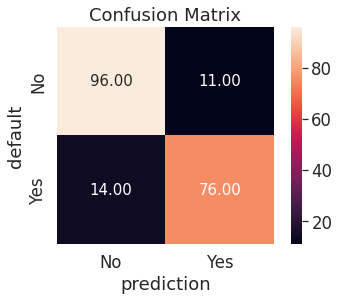

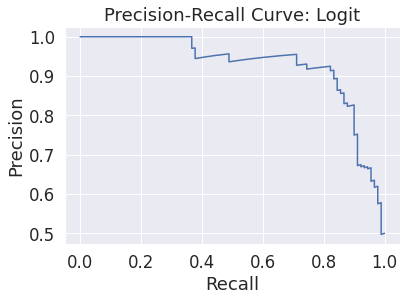

f1-score:  0.8587570621468928


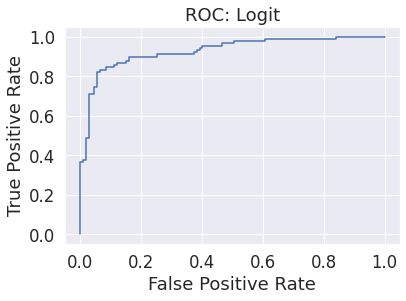

AUC:  0.9292834890965731


In [18]:
#control variables
normalize = True

#load dataset
cols = ['age','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
xcols = cols[0:-1]
ycol = cols[-1]
df_full = pd.read_csv('/content/processed.cleveland.data', header=None, index_col=None, names=cols, na_values=['?'])
df = df_full.iloc[:200,:]
df_te = df_full.iloc[200:,:]
df = df.dropna()
df.head()

# binarize output
out = 1-pd.get_dummies(df[ycol])[0]
out.name = 'HD' # new column name

# design matrices
X = df[xcols].to_numpy()
m, n = X.shape

xmean = X.mean()
xstd = X.std()
if normalize:
    X = (X - xmean)/xstd

Y = out.to_numpy()

# Train simple Logit model as a benchmark
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X, Y)
Y_hat = logreg.predict(X)
Y_hat_scores = logreg.predict_proba(X)[:,1]

# print some results
accuracy = sum(Y_hat == np.array(Y).reshape(m,))/(1.0*len(Y))
print("Baseline Accuracy: ", accuracy)

from sklearn.metrics import confusion_matrix, precision_recall_curve, f1_score, roc_curve, roc_auc_score
cm = confusion_matrix(Y, Y_hat)
plt.figure()
sns.set(font_scale=1.5)
hm = sns.heatmap( cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=['No', 'Yes'], xticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.ylabel('default')
plt.xlabel('prediction')
plt.show()

# Precision and Recall curve
precision, recall, thresholds = precision_recall_curve(Y, Y_hat_scores)
plt.figure()
plt.plot(recall, precision)
plt.title("Precision-Recall Curve: Logit")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

print ("f1-score: ", f1_score(Y, Y_hat))

# ROC and AUC
fpr, tpr, thresholds = roc_curve(Y, Y_hat_scores)
plt.figure()
plt.plot(fpr, tpr)
plt.title("ROC: Logit")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print ("AUC: ", roc_auc_score(Y, Y_hat_scores))

In [ ]:
df.shape

(197, 13)

Baseline Accuracy TEST:  0.7766990291262136


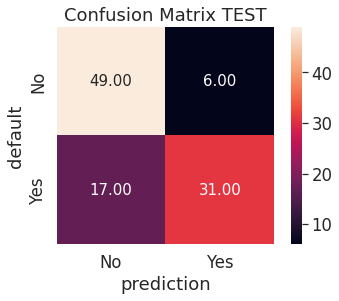

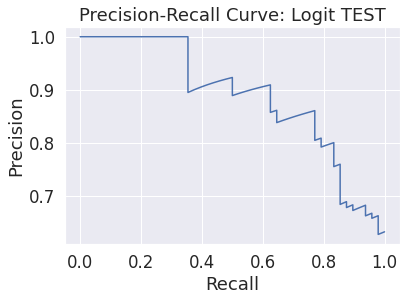

f1-score TEST:  0.7294117647058824


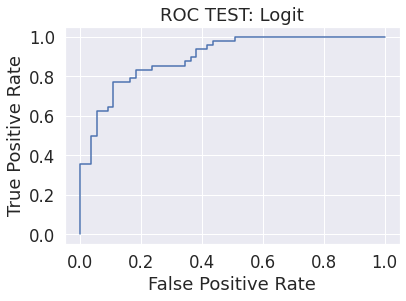

AUC TEST:  0.8973484848484848


In [19]:
# Test
#df_te = pd.read_csv('/content/processed.cleveland.data', header=None, index_col=None, names=cols, na_values=['?'])
df_te = df_te.fillna(method='pad')
df_te = df_te.fillna(method='backfill')
df_te.head()

out_te = 1-pd.get_dummies(df_te[ycol])[0]
out_te.name = 'HD' # new column name

X_te = df_te[xcols].to_numpy()
m_te, n = X_te.shape

if normalize:
    X_te = (X_te - xmean)/xstd

Y_te = out_te.to_numpy()

Y_te_hat = logreg.predict(X_te)
Y_te_hat_scores = logreg.predict_proba(X_te)[:,1]

# print some results
accuracy = sum(Y_te_hat == np.array(Y_te).reshape(m_te,))/(1.0*len(Y_te))
print("Baseline Accuracy TEST: ", accuracy)

cm = confusion_matrix(Y_te, Y_te_hat)
plt.figure()
sns.set(font_scale=1.5)
hm = sns.heatmap( cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=['No', 'Yes'], xticklabels=['No', 'Yes'])
plt.title('Confusion Matrix TEST')
plt.ylabel('default')
plt.xlabel('prediction')
plt.show()

# Precision and Recall curve
precision, recall, thresholds = precision_recall_curve(Y_te, Y_te_hat_scores)
plt.figure()
plt.plot(recall, precision)
plt.title("Precision-Recall Curve: Logit TEST")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

print ("f1-score TEST: ", f1_score(Y_te, Y_te_hat))

# ROC and AUC
fpr, tpr, thresholds = roc_curve(Y_te, Y_te_hat_scores)
plt.figure()
plt.plot(fpr, tpr)
plt.title("ROC TEST: Logit")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print ("AUC TEST: ", roc_auc_score(Y_te, Y_te_hat_scores))

##Task - Draw learning curves

Plot the learning curves using the data to understand the relation between the error and model complexity. These curves are called ` Learning curves` where you use training and validation data to plot the model performance. 

An example plot is given below to understand the curve.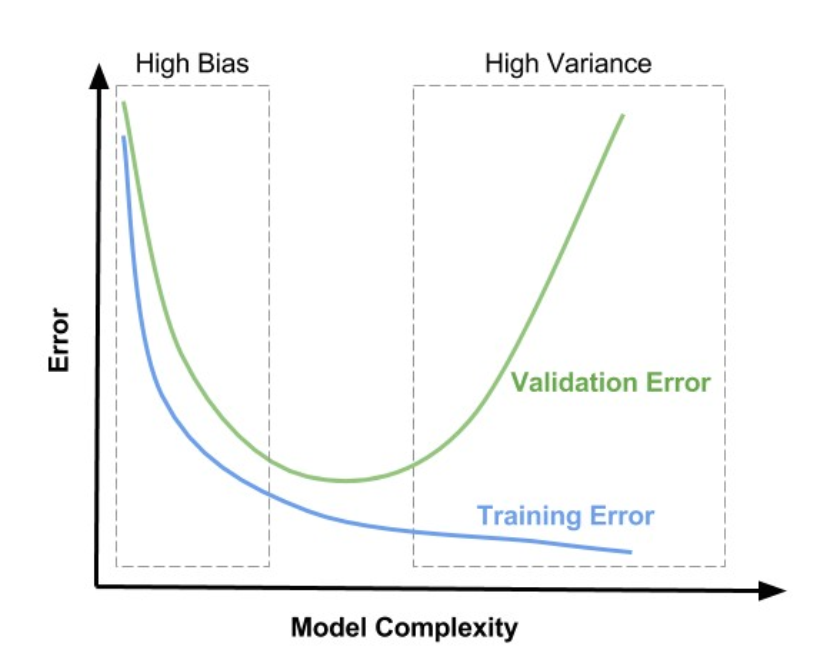

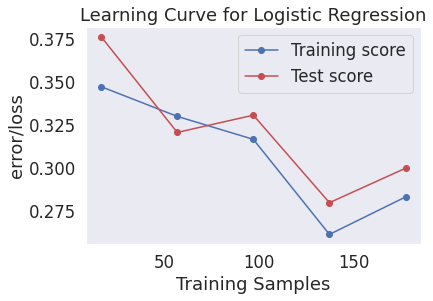

In [25]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

model = LogisticRegression()

train_size, train_score, test_score = learning_curve(estimator=model, X=X, y=Y, cv=10, scoring = None )

train_loss_m = 1 - np.mean(train_score, axis=1)
test_loss_m = 1- np.mean(test_score, axis=1)

plt.plot(train_size, train_loss_m, 'o-', color="b")
plt.plot(train_size, test_loss_m, 'o-', color="r")
plt.legend(('Training score', 'Test score'), loc='best')
plt.xlabel("Training Samples")
plt.ylabel("error/loss")
plt.title("Learning Curve for Logistic Regression")
plt.grid()

plt.show()